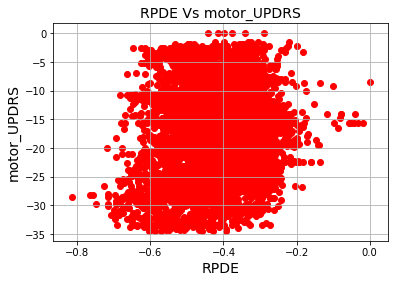

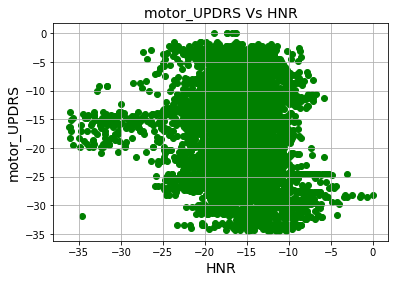

Intercept: 
 -20.094937453586564
Coefficients: 
 [ 4.52528658 -0.23578994]
8.012589366738263
0.017335275906584235
                            OLS Regression Results                            
Dep. Variable:            motor_UPDRS   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     77.67
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           5.08e-34
Time:                        23:35:51   Log-Likelihood:                -20570.
No. Observations:                5875   AIC:                         4.115e+04
Df Residuals:                    5872   BIC:                         4.117e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("parkinsons_updrs.data.csv")
X1 = data['RPDE']
X2 = data['HNR']

Y2 = data['motor_UPDRS']
X1 = np.array((X1 - X1.min())-(X1.max() - X1.min()))
X2 = np.array((X2 - X2.min())-(X2.max() - X2.min()))
Y2 = np.array((Y2 - Y2.min())-(Y2.max() - Y2.min()))

data['RPDE'] = X1
data['HNR'] = X2
data['motor_UPDRS'] = Y2

plt.scatter(X1, Y2, color='red')
plt.title('RPDE Vs motor_UPDRS', fontsize=14)
plt.xlabel('RPDE', fontsize=14)
plt.ylabel('motor_UPDRS', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(X2, Y2, color='green')
plt.title('motor_UPDRS Vs HNR', fontsize=14)
plt.xlabel('HNR', fontsize=14)
plt.ylabel('motor_UPDRS', fontsize=14)
plt.grid(True)
plt.show()


X = data[['RPDE','HNR']]
Y = data['motor_UPDRS']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

regrr = linear_model.LinearRegression()
regrr.fit(X_train, Y_train)

print('Intercept: \n', regrr.intercept_)
print('Coefficients: \n', regrr.coef_)


RPDE = 0.7
HNR = 0.11
Y_pred=regrr.predict(X_test)
#print ('Predicted motor UPDRS: \n', regr.predict([[RPDE ,HNR]]))
test_set_rmse = (np.sqrt(mean_squared_error(Y_test,Y_pred)))

test_set_r2 = r2_score(Y_test, Y_pred)
print(test_set_rmse)
print(test_set_r2)

X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

